In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [3]:
df.shape

(3554, 18)

In [4]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7586.0      3.0       2.0       2       2.0    New Property   
1          8597.0      2.0       2.0       2       4.0    New Property   
2          5470.0      2.0       2.0       1      17.0    New Property   
3          8020.0      3.0       4.0      3+      10.0  Relatively New   
4          9023.0      2.0       2.0       1       5.0  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0         0.0           0.0         0.0         0.0     0.0   
1         1226.0         1.0           1.0         0.0         0.0     0.0   
2         1000.0         0.0           0.0         0.0         0.0     0.0   
3         1615.0         0.0           1.0         0.0         0.0     1.0   
4          582.0         0.0           0.0         1.0         0.0     0.0   

   furnishing_type  luxury_score  
0              0.0           8.0  
1              0.0          38.0  
2              0.0          49.0  
3              1.0         174.0  
4              0.0         159.0

In [5]:
latlong = pd.read_csv("latlong.csv")

In [6]:
latlong

sector             coordinates
0       sector 1  28.3663° N, 76.9456° E
1       sector 2  28.5095° N, 77.0320° E
2       sector 3  28.4909° N, 77.0176° E
3       sector 4  28.4738° N, 77.0107° E
4       sector 5  28.4794° N, 77.0176° E
..           ...                     ...
124   sector 113  28.5287° N, 77.0233° E
125   sector 114  28.5334° N, 77.0118° E
126   sector 115  28.5385° N, 77.0061° E
127  gwal pahari  28.4484° N, 77.0210° E
128      manesar  28.3515° N, 76.9428° E

[129 rows x 2 columns]

In [7]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [8]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [9]:
latlong.head()

sector             coordinates  latitude  longitude
0  sector 1  28.3663° N, 76.9456° E   28.3663    76.9456
1  sector 2  28.5095° N, 77.0320° E   28.5095    77.0320
2  sector 3  28.4909° N, 77.0176° E   28.4909    77.0176
3  sector 4  28.4738° N, 77.0107° E   28.4738    77.0107
4  sector 5  28.4794° N, 77.0176° E   28.4794    77.0176

In [10]:
new_df = df.merge(latlong, on='sector')

In [11]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [12]:
group_df = new_df.groupby('sector').mean(numeric_only=True)[['price','price_per_sqft','built_up_area','latitude','longitude']]

In [13]:
group_df

price  price_per_sqft  built_up_area  latitude  longitude
sector                                                                   
gwal pahari  3.192222     9585.777778    3056.166667   28.4484    77.0210
manesar      0.962258     4608.064516    2027.367742   28.3515    76.9428
sector 1     1.860000     8249.833333    2327.833333   28.3663    76.9456
sector 10    2.092857    11866.571429    1908.857143   28.4537    77.0009
sector 102   1.696636    10603.822430    1556.130841   28.4750    76.9715
...               ...             ...            ...       ...        ...
sector 91    1.648235     7586.117647    2028.647059   28.4014    76.9225
sector 92    0.934000     5928.290000    1571.341800   28.4079    76.9153
sector 93    0.848889     8009.888889    1017.000000   28.4153    76.9326
sector 95    0.480545     5602.509091     995.981818   28.4172    76.9081
sector 99    1.008095     6412.166667    1364.214286   28.4640    76.9614

[101 rows x 5 columns]

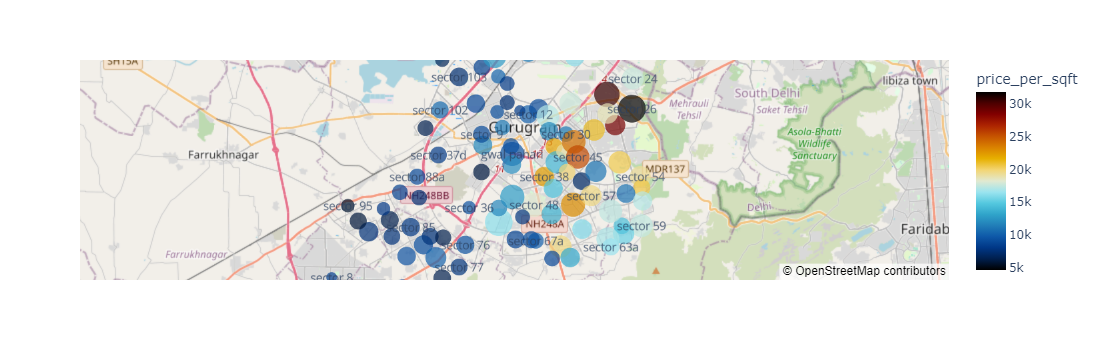

In [14]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [15]:
new_df.to_csv('data_viz1.csv',index=False)

In [16]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [17]:
df1.head()

property_name property_type  \
0           5 Bedroom House for sale in Bhim Nagar         house   
1                  4 BHK Flat in Sector 56 Gurgaon          flat   
2                 2 BHK Flat in Sector 99A Gurgaon          flat   
3  2 Bedroom House for sale in Ashok Vihar Phase 3         house   
4                       2 BHK Flat in Shanti Nagar          flat   

                    society  price  price_per_sqft    area  \
0               independent   0.50         13889.0   360.0   
1            the lions cghs   2.00          8333.0  2400.0   
2  pareena laxmi apartments   0.31          5904.0   525.0   
3               independent   0.50          5555.0   900.0   
4           ganga apartment   0.55          3352.0  1641.0   

                                        areaWithType  bedRoom  bathroom  \
0                          Plot area 40(33.45 sq.m.)        5         3   
1  Super Built up area 2400(222.97 sq.m.)Carpet a...        4         4   
2                     Carpet area: 525 (48.77 sq.m.)        2         2   
3                         Plot area 900(83.61 sq.m.)        2         1   
4  Super Built up area 1700(157.94 sq.m.)Built Up...        2         2   

  balcony additionalRoom                                            address  \
0       3  not available                  539, Bhim Nagar, Gurgaon, Haryana   
1       3         others                Sector 56 Gurgaon, Gurgaon, Haryana   
2       2  not available  Tower-4, 607(6th Floor), Sector 99A Gurgaon, G...   
3       2     store room              Ashok Vihar Phase 3, Gurgaon, Haryana   
4       1  not available                     Shanti Nagar, Gurgaon, Haryana   

   floorNum      facing     agePossession  \
0       3.0         NaN      10+ Year Old   
1       8.0        West   1 to 5 Year Old   
2       6.0        East   0 to 1 Year Old   
3       1.0         NaN      10+ Year Old   
4       3.0  North-East  5 to 10 Year Old   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
1  ['Sector metro station', 'Sector metro station...   
2  ['Dwarka Expy', 'Govt. Sr. Sec. School', 'Exce...   
3                                                NaN   
4  ['Rajiv Chowk Mosque', 'Hanuman Mandir', 'Stat...   

                                         description  \
0  It has spacious rooms and third floor has been...   
1  Located in the popular residential address of ...   
2  It's east facing and middle floor(6th). Corner...   
3  Independent house, near to main road. Near by ...   
4  Cash payment can be accepted\nPrime location ,...   

                                      furnishDetails  \
0  ['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'N...   
1  ['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Ge...   
2                                                NaN   
3  ['1 Wardrobe', '3 Light', 'No AC', 'No Bed', '...   
4  ['4 Fan', '1 Exhaust Fan', '1 Dining Table', '...   

                                            features  \
0                                                NaN   
1  ['Feng Shui / Vaastu Compliant', 'Security / F...   
2  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...   
3                    ['Natural Light', 'Airy Rooms']   
4  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...   

                                              rating  
0  ['Environment3 out of 5', 'Lifestyle4 out of 5...  
1  ['Environment4 out of 5', 'Lifestyle5 out of 5...  
2  ['Green Area4.5 out of 5', 'Construction4 out ...  
3                                                NaN  
4  ['Safety4 out of 5', 'Lifestyle4 out of 5', 'E...

In [18]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [19]:
wordcloud_df.head()

features      sector
0                                                NaN   sector 36
1  ['Feng Shui / Vaastu Compliant', 'Security / F...   sector 89
2  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...  sohna road
3                    ['Natural Light', 'Airy Rooms']   sector 92
4  ['Security / Fire Alarm', 'Feng Shui / Vaastu ...  sector 102

In [20]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [21]:
main

['Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'No open drainage around',
 'Visitor Parking',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Natural Light',
 'Airy Rooms',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Lift(s)',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'No open drainage around',
 'Visitor Parking',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Low Density Society',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Private Garden / Terrace',
 'High

In [22]:
from wordcloud import WordCloud

In [23]:
feature_text = ' '.join(main)

In [24]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [25]:
feature_text

'Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Security / Fire Alarm Feng Shui / Vaastu Compliant Lift(s) Maintenance Staff Water Storage No open drainage around Visitor Parking Park Security Personnel Natural Light Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Natural Light Airy Rooms Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Lift(s) Maintenance Staff False Ceiling Lighting Water Storage No open drainage around Visitor Parking Security Personnel Natural Light Airy Rooms Low Density Society Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Private Garden / Terrace High Ceiling Height Recently Renovated Piped-gas Swimming Pool Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Fitness Centre / GYM Rain Water Har

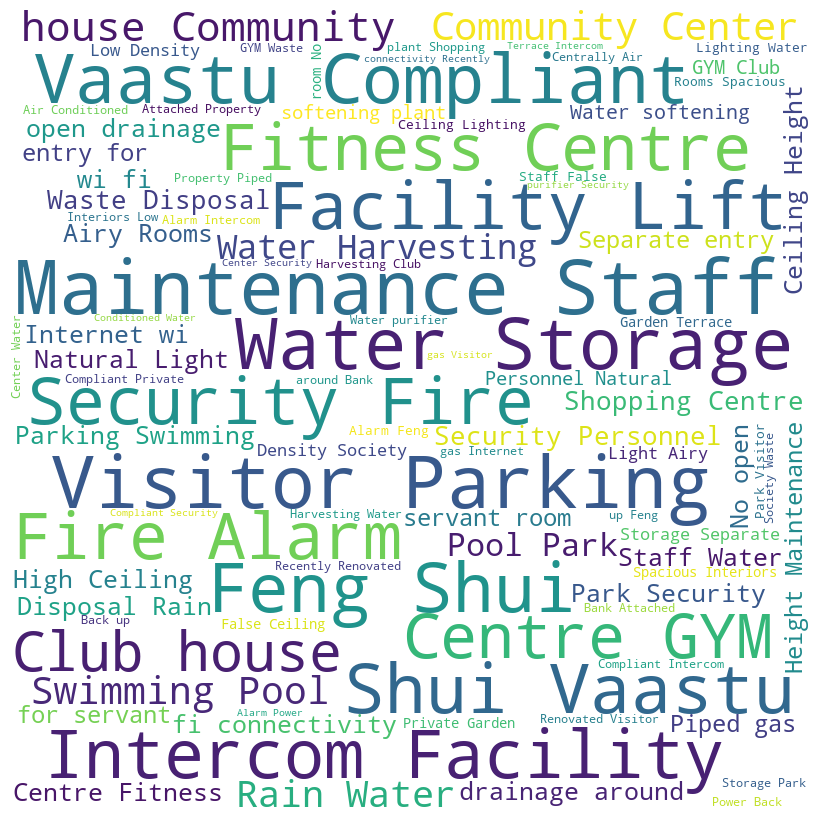

In [26]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

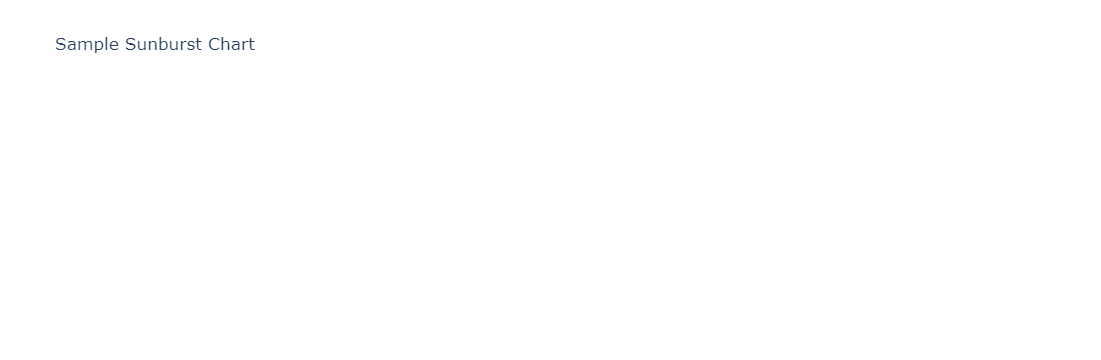

In [27]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

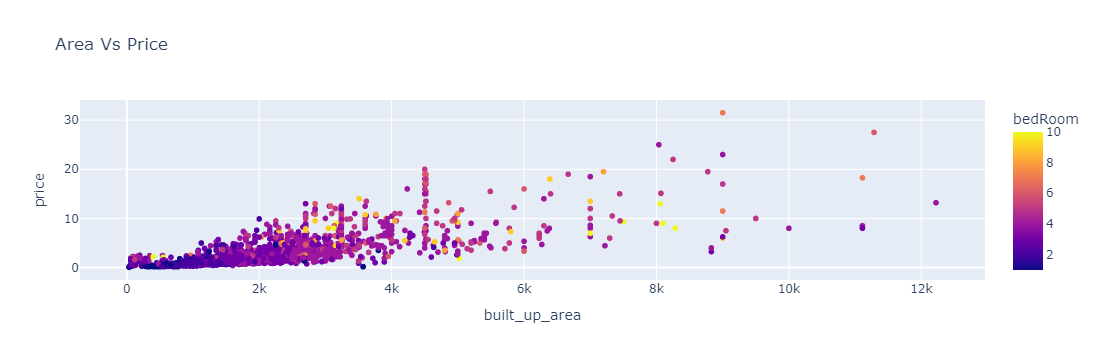

In [28]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

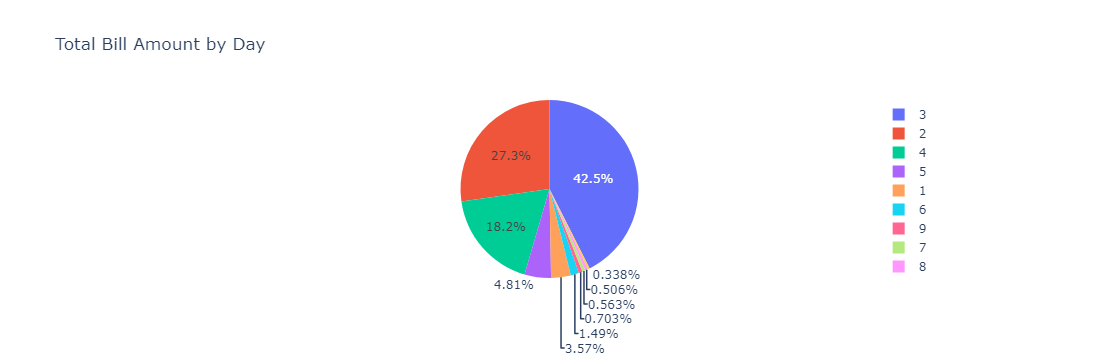

In [29]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

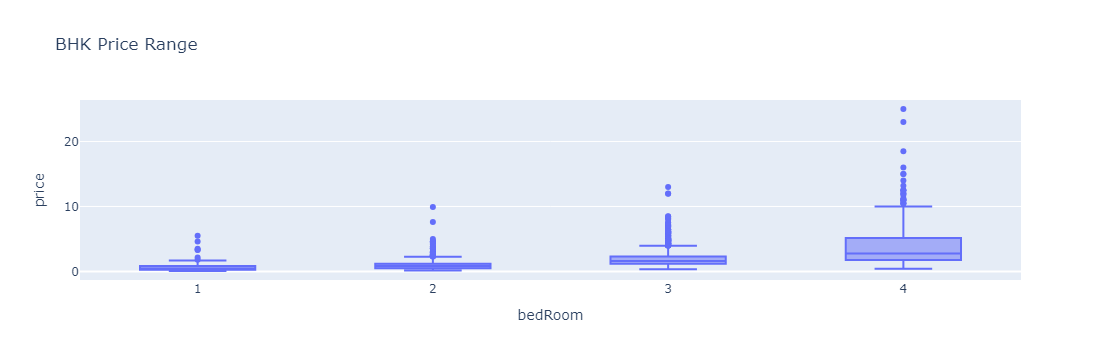

In [30]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()

C:\Users\saitarun\AppData\Local\Temp\ipykernel_28732\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\saitarun\AppData\Local\Temp\ipykernel_28732\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

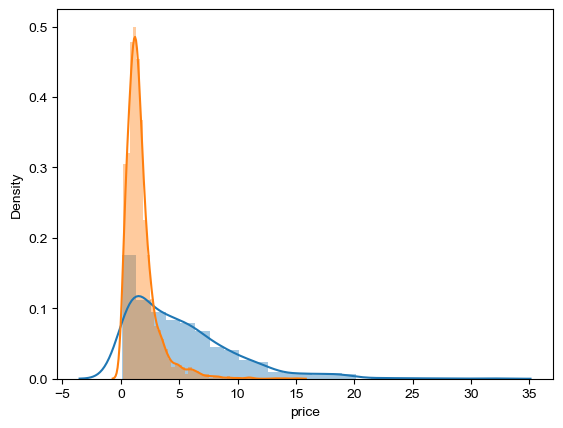

In [31]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [32]:
new_df['sector'].unique().tolist().insert(0,'overall')